<a href="https://colab.research.google.com/github/suryashankhi/NIT6150_Adv_Project_G3/blob/main/ADP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow_addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.4 MB/s eta 0:00:00


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import base64
from IPython.display import display, HTML
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer, Conv2D



In [4]:
# Step 1: Import the dataset into the model

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the data path in your Google Drive
data_path = '/content/drive/MyDrive/donateacry_corpus/'

Mounted at /content/drive


In [5]:
# List all files in the specified folder
files = os.listdir(data_path)

# Print the list of files
for file in files:
    print(file)


discomfort
tired
burping
belly_pain
hungry


In [6]:
# Function to print the first n files from a folder
def print_files(folder_path, n=5):
    print(f"Files from folder: {folder_path}")
    count = 0

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            print(file_path)
            count += 1

            if count == n:
                return  # Stop after printing n files

# List all files in the specified folder and its subfolders
for root, dirs, files in os.walk(data_path):
    for dir in dirs:
        folder_path = os.path.join(root, dir)
        print_files(folder_path, n=5)


Files from folder: /content/drive/MyDrive/donateacry_corpus/discomfort
/content/drive/MyDrive/donateacry_corpus/discomfort/837fd072-8704-4196-9ff1-1d2c07886e55-1432429478471-1.7-m-22-dc.wav
/content/drive/MyDrive/donateacry_corpus/discomfort/1309B82C-F146-46F0-A723-45345AFA6EA8-1432801703-1.1-f-26-dc.wav
/content/drive/MyDrive/donateacry_corpus/discomfort/d6cda191-4962-4308-9a36-46d5648a95ed-1431161889263-1.7-m-04-dc.wav
/content/drive/MyDrive/donateacry_corpus/discomfort/1309B82C-F146-46F0-A723-45345AFA6EA8-1430703937-1.0-f-48-dc.wav
/content/drive/MyDrive/donateacry_corpus/discomfort/1309B82C-F146-46F0-A723-45345AFA6EA8-1430704008-1.0-f-48-dc.wav
Files from folder: /content/drive/MyDrive/donateacry_corpus/tired
/content/drive/MyDrive/donateacry_corpus/tired/b4c460d8-bd6b-4017-9bb8-2ae4ff0c5af1-1430418266487-1.7-f-26-ti.wav
/content/drive/MyDrive/donateacry_corpus/tired/cecd525b-18fd-49e3-b2b9-dfb08b93ad95-1430110029205-1.7-m-26-ti.wav
/content/drive/MyDrive/donateacry_corpus/tired/ca

In [7]:
# Function to create a spectrogram from an audio file and save it as an image
def create_spectrogram(audio_file, image_file):
    fig, ax = plt.subplots(figsize=(10, 4))

    # Load audio file using librosa
    y, sr = librosa.load(audio_file)

    # Create Mel spectrogram
    ms = librosa.feature.melspectrogram(y=y, sr=sr)

    # Convert to logarithmic scale
    log_ms = librosa.power_to_db(ms, ref=np.max)

    # Display the spectrogram with labels
    librosa.display.specshow(log_ms, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    # Save the spectrogram as an image
    fig.savefig(image_file)
    plt.close(fig)



In [8]:
# Function to create spectrograms from audio files in a directory
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [9]:
# Create spectrograms for each category
create_pngs_from_wavs(data_path + 'belly_pain', '/working/belly_pain')
create_pngs_from_wavs(data_path + 'burping', '/working/burping')
create_pngs_from_wavs(data_path + 'discomfort', '/working/discomfort')
create_pngs_from_wavs(data_path + 'hungry', '/working/hungry')
create_pngs_from_wavs(data_path + 'tired', '/working/tired')




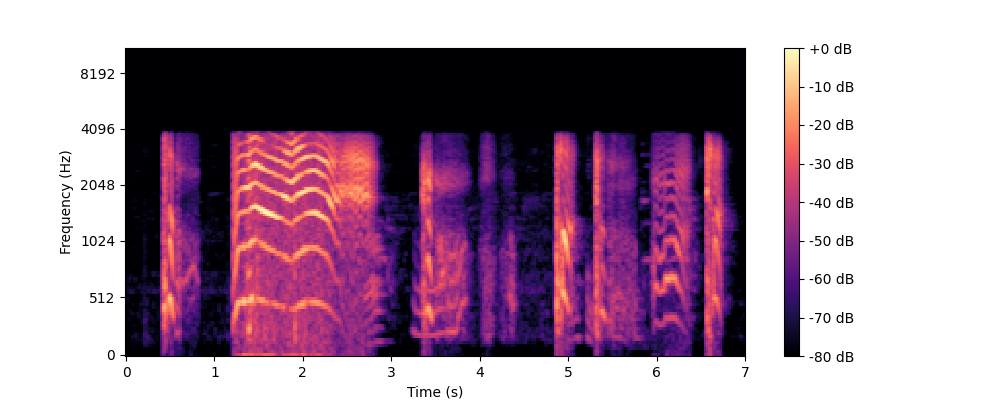
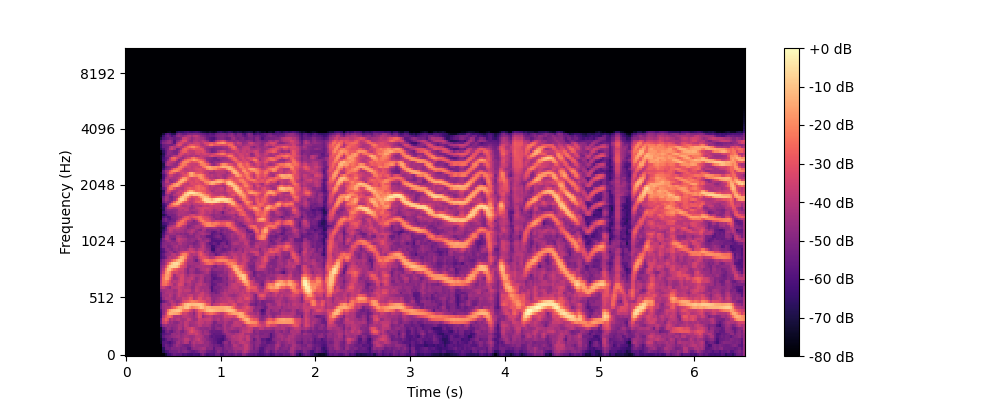


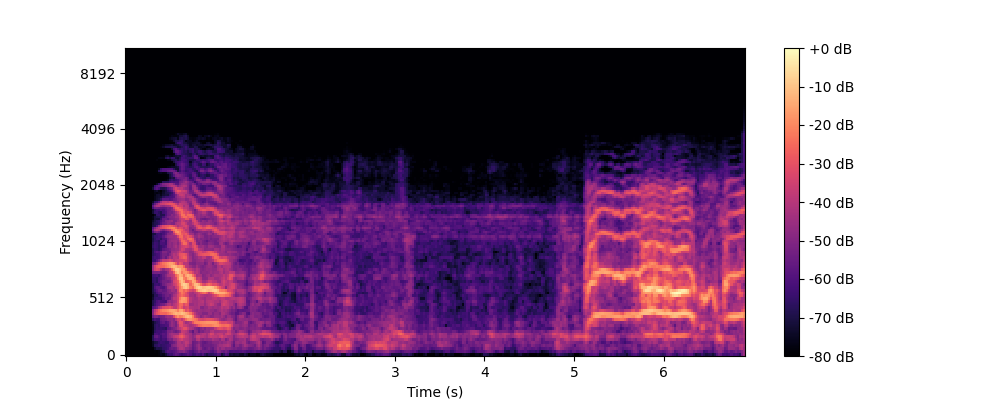
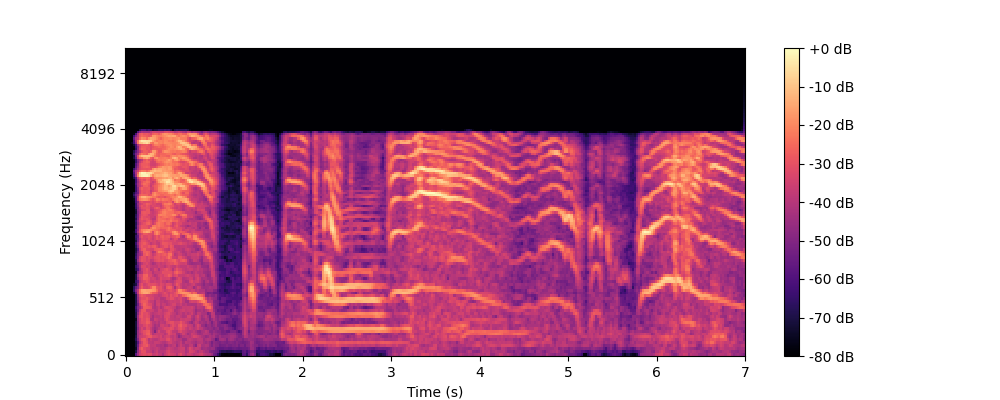


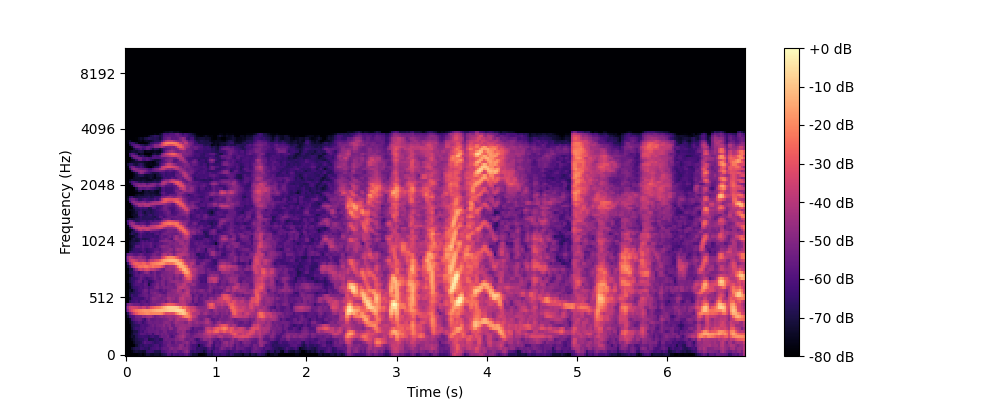
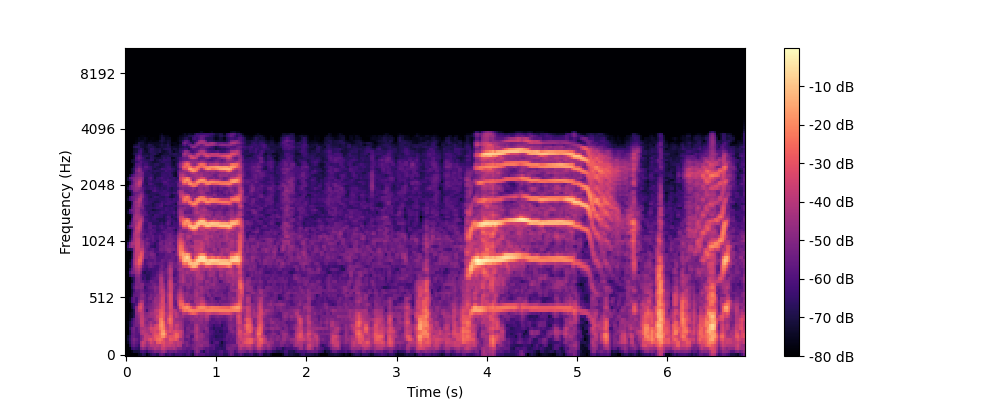


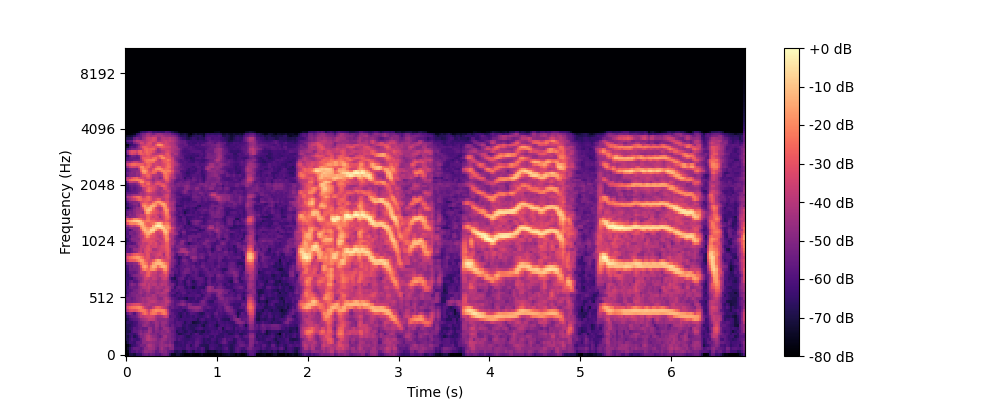
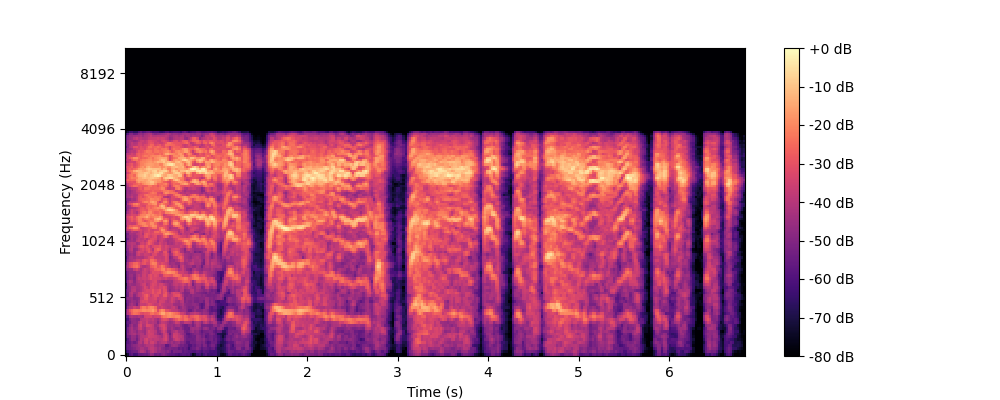


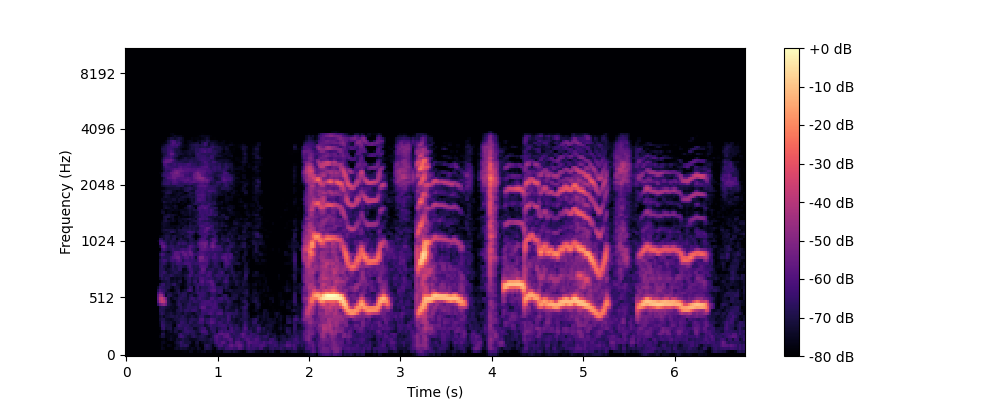
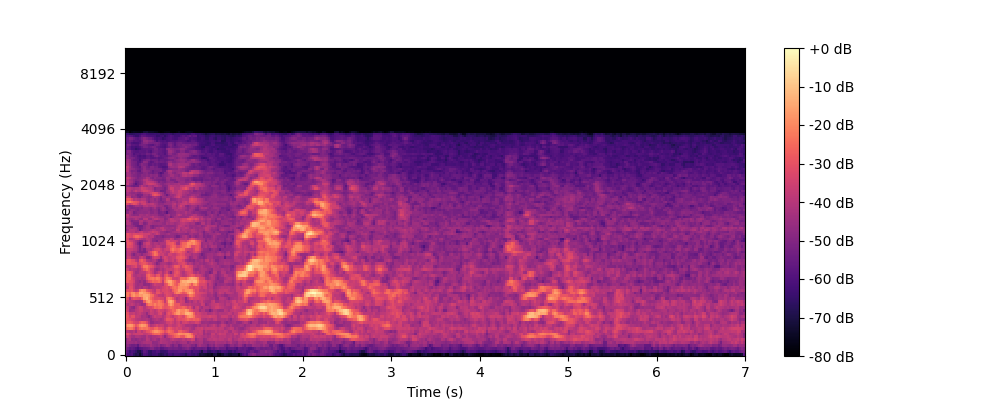

In [10]:
# Function to encode image to base64 format
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")
    return f"data:image/png;base64,{encoded_image}"

# Function to display PNG images with labels
def display_png(directory):
    category_html_strings = []

    for root, dirs, files in os.walk(directory):
        category = os.path.basename(root)
        html_str = f"<h2>{category}</h2><div style='display:flex;flex-wrap:wrap;'>"

        images_displayed = 0

        for file in files:
            if file.endswith('.png') and images_displayed < 2:
                image_path = os.path.join(root, file)
                encoded_image = encode_image(image_path)
                html_str += f"<img src='{encoded_image}' style='width:800px;margin:5px;'>"
                images_displayed += 1

        html_str += "</div>"
        category_html_strings.append(html_str)

    for category_html in category_html_strings:
        display(HTML(category_html))

# Example usage:
display_png('/working/')